# Final assignemt - Statistics
## Reanana Duvdevani and Hila Monsonego

# Imports

In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import scikit_posthocs as sp
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the data

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/hilamonso/hilamonso/refs/heads/main/GaltonFamilies.csv')

In [6]:
df.head()

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,001,78.5,67.0,75.43,4,1,male,73.2
1,2,001,78.5,67.0,75.43,4,2,female,69.2
2,3,001,78.5,67.0,75.43,4,3,female,69.0
3,4,001,78.5,67.0,75.43,4,4,female,69.0
4,5,002,75.5,66.5,73.66,4,1,male,73.5


In [7]:
#corrections
correct_df = df
correct_df.replace("male", 1, inplace=True)
correct_df.replace("female", 0, inplace=True)
for i in range(136, 205):
    correct_df.replace(str(i), i+1, inplace=True)
correct_df.replace("136A", 136, inplace=True)
for i in range(0, 609):
    correct_df.replace(correct_df["family"].iloc[i], int(
        correct_df["family"].iloc[i]), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_22656\2495239721.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correct_df.replace("female", 0, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22656\2495239721.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correct_df.replace(correct_df["family"].iloc[i], int(


In [8]:
correct_df

,rownames,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,1,78.5,67.0,75.43,4,1,1,73.2
1,2,1,78.5,67.0,75.43,4,2,0,69.2
2,3,1,78.5,67.0,75.43,4,3,0,69.0
3,4,1,78.5,67.0,75.43,4,4,0,69.0
4,5,2,75.5,66.5,73.66,4,1,1,73.5
...,...,...,...,...,...,...,...,...,...
929,930,204,62.0,66.0,66.64,3,1,1,64.0
930,931,204,62.0,66.0,66.64,3,2,0,62.0
931,932,204,62.0,66.0,66.64,3,3,0,61.0
932,933,205,62.5,63.0,65.27,2,1,1,66.5


In [9]:
df=correct_df

# Exploring the data

## Distributions

In [12]:
# Auxilarity function
def check_normality(data, threshold=30):
    """
    Perform a normality test using the Shapiro-Wilk test for small samples
    and the Kolmogorov-Smirnov test for larger samples.

    Parameters:
    data (list or array-like): The sample data to test for normality.
    threshold (int): The sample size threshold to switch between tests. Default is 30.

    Returns:
    test_name (str): The name of the test performed.
    statistic (float): The test statistic.
    p_value (float): The p-value of the test.
    """

    n = len(data)

    if n <= threshold:
        test_name = "Shapiro-Wilk"
        statistic, p_value = stats.shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        statistic, p_value = stats.kstest(
            data, 'norm', args=(np.mean(data), np.std(data)))

    print("p value:%.4f" % p_value)
    if p_value < 0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

### Number of children in family distribution

p value:0.0004
Reject null hypothesis >> The data is not normally distributed


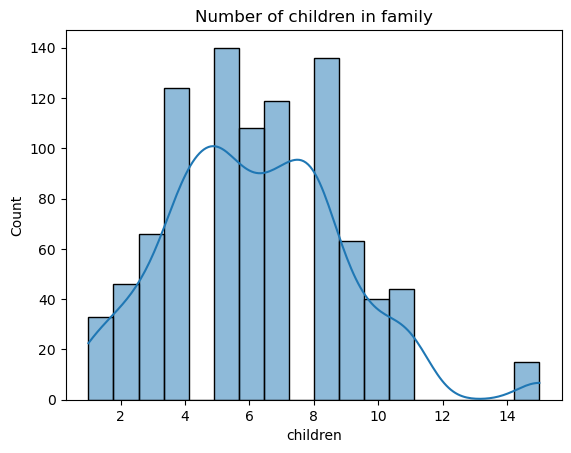

In [14]:
plt.title("Number of children in family")
sns.histplot(df,
               x = "children",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"]))

### Children height distribution

p value:0.0004
Reject null hypothesis >> The data is not normally distributed


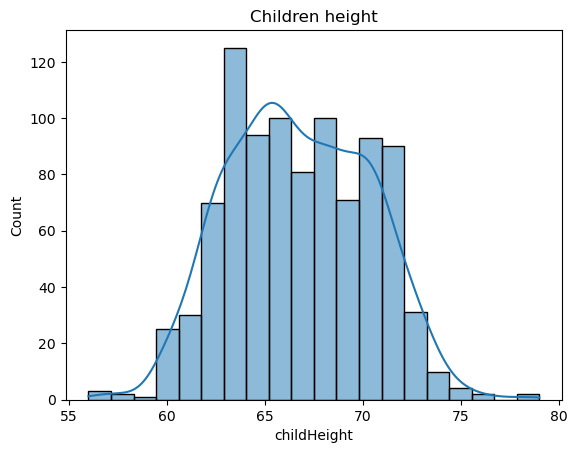

In [16]:
plt.title("Children height")
sns.histplot(df,
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"]))

### Sons height distribution

p value:0.0013
Reject null hypothesis >> The data is not normally distributed


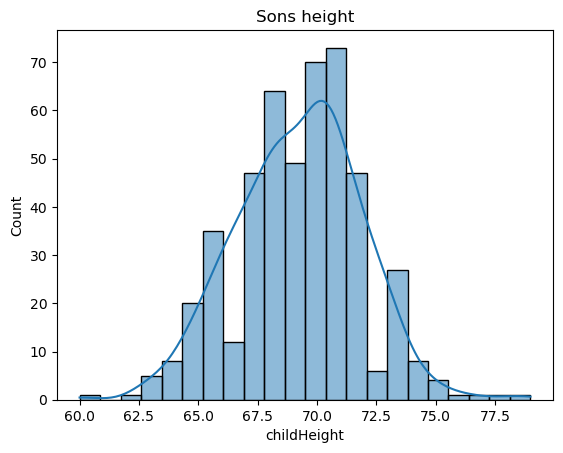

In [18]:
plt.title("Sons height")
sns.histplot(df[df["gender"]==1],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"])[np.where(np.array(df["gender"])==1)])

### Daughters height distribution

p value:0.0718
Fail to reject null hypothesis >> The data is normally distributed


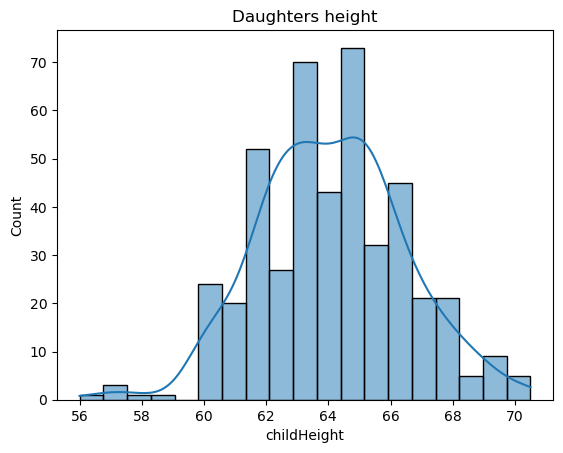

In [20]:
plt.title("Daughters height")
sns.histplot(df[df["gender"]==0],
               x = "childHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(df["childHeight"])[np.where(np.array(df["gender"])==0)])

### Fathers height distribution

In [22]:
# In order to count each father/mother only once
representatives_df=df[df["childNum"]==1]

p value:0.0995
Fail to reject null hypothesis >> The data is normally distributed


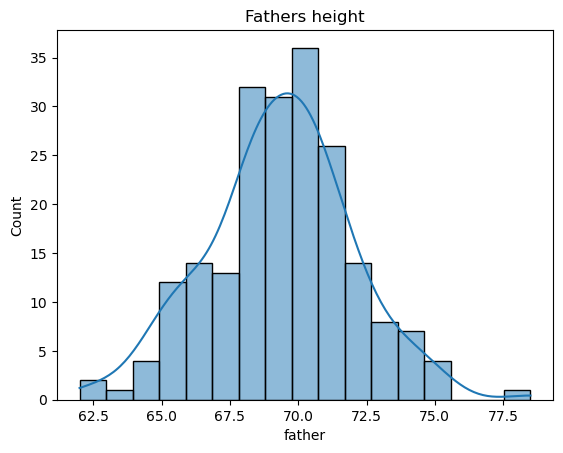

In [23]:
plt.title("Fathers height")
sns.histplot(representatives_df,
               x = "father",
               stat = 'count',
               kde = True)
check_normality(np.array(representatives_df["father"]))

### Mothers height distribution

p value:0.1001
Fail to reject null hypothesis >> The data is normally distributed


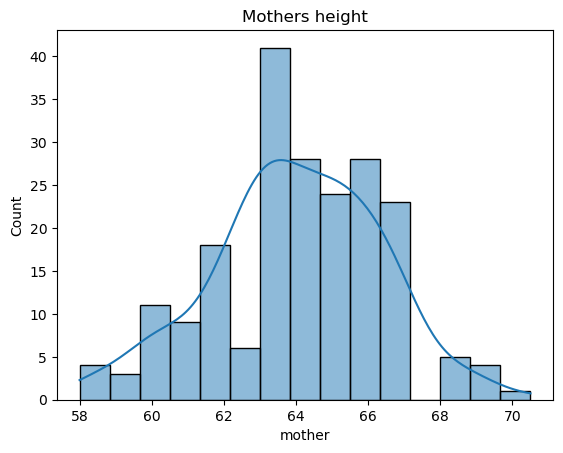

In [25]:
plt.title("Mothers height")
sns.histplot(representatives_df,
               x = "mother",
               stat = 'count',
               kde = True)
check_normality(np.array(representatives_df["mother"]))

### Galton MidParent height distribution

p value:0.8319
Fail to reject null hypothesis >> The data is normally distributed


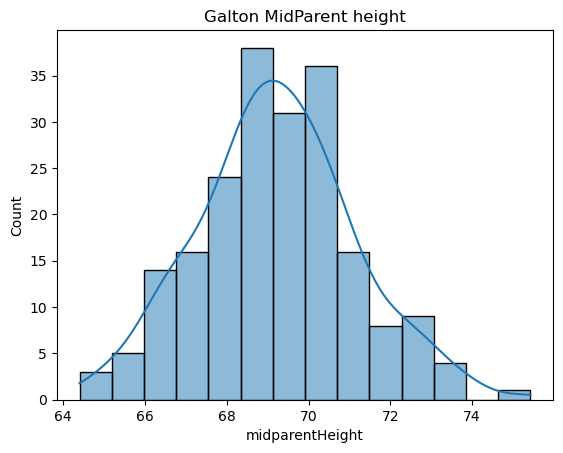

In [27]:
plt.title("Galton MidParent height")
sns.histplot(representatives_df,
               x = "midparentHeight",
               stat = 'count',
               kde = True)
check_normality(np.array(representatives_df["midparentHeight"]))

## Comparison tests

### Comparing the height distribution of children whose fathers are taller than average to the height distribution of children whose fathers are lower than average, using Levene and Wilcoxon

In [30]:
fathers=np.array(representatives_df["father"])
fathers_mean=np.mean(fathers)
children=np.array(representatives_df["childHeight"])
children_mean=np.mean(children)

# Check normality
children_who_their_father_is_under_the_average=np.array(df[df["father"]<fathers_mean]["childHeight"])
print("children who their father is under the average", check_normality(children_who_their_father_is_under_the_average))
children_who_their_father_is_above_the_average=np.array(df[df["father"]>=fathers_mean]["childHeight"])
print("children who their mother is under the average", check_normality(children_who_their_father_is_above_the_average))

p value:0.0358
Reject null hypothesis >> The data is not normally distributed
children who their father is under the average None
p value:0.0081
Reject null hypothesis >> The data is not normally distributed
children who their mother is under the average None


In [31]:
# Check variance homogeneity
test_stat, p_val = stats.levene(children_who_their_father_is_under_the_average, children_who_their_father_is_above_the_average)
print("p value:%.4f" % p_val)
if p_val <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.3882
Fail to reject null hypothesis >> The variances of the samples are same.


In [32]:
# Fix the groups to be at the same shape in order to implement the wilcoxon test
children_who_their_father_is_under_the_average=children_who_their_father_is_under_the_average[:450]

In [33]:
# Calculate medians
print(np.median(children_who_their_father_is_under_the_average))
print(np.median(children_who_their_father_is_above_the_average))

66.0
67.5


In [34]:
# Compare medians using wilcoxon
test,pvalue = stats.wilcoxon(children_who_their_father_is_under_the_average, children_who_their_father_is_above_the_average, alternative="less")
if pvalue <0.05:
    print("Reject null hypothesis: the median of the children who their father is under the average height is less than the median of the children who their father is above the average height")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis: the median of the children who their father is under the average height is less than the median of the children who their father is above the average height


### Comparing the height distribution of children whose mothers are taller than average to the height distribution of children whose mothers are lower than average, using Levene and Wilcoxon

In [36]:
mothers=np.array(representatives_df["mother"])
mothers_mean=np.mean(mothers)
children=np.array(representatives_df["childHeight"])
children_mean=np.mean(children)

# Check normality
children_who_their_mother_is_under_the_average=np.array(df[df["mother"]<mothers_mean]["childHeight"])
print(check_normality(children_who_their_mother_is_under_the_average))
children_who_their_mother_is_above_the_average=np.array(df[df["mother"]>=mothers_mean]["childHeight"])
print(check_normality(children_who_their_mother_is_above_the_average))

p value:0.0126
Reject null hypothesis >> The data is not normally distributed
None
p value:0.0151
Reject null hypothesis >> The data is not normally distributed
None


In [37]:
# Check variance homogeneity using Levene test
test_stat, p_val = stats.levene(children_who_their_mother_is_under_the_average, children_who_their_mother_is_above_the_average)
print("p value:%.4f" % p_val)
if p_val <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0020
Reject null hypothesis >> The variances of the samples are different.


In [38]:
# Fix the groups to be at the same shape in order to implement the wilcoxon test
children_who_their_mother_is_under_the_average=children_who_their_mother_is_under_the_average[:443]

In [39]:
# Calculate medians
print(np.median(children_who_their_mother_is_under_the_average))
print(np.median(children_who_their_mother_is_above_the_average))

66.5
67.0


In [40]:
# Compare medians using wilcoxon
test,pvalue = stats.wilcoxon(children_who_their_father_is_under_the_average, children_who_their_father_is_above_the_average, alternative="less")
if pvalue <0.05:
    print("Reject null hypothesis: the median of the children who their mother is under the average height is less than the median of the children who their mother is above the average height")
else:
    print("Fail to reject null hypothesis")

Reject null hypothesis: the median of the children who their mother is under the average height is less than the median of the children who their mother is above the average height


In [41]:
sorted_df=df.sort_values("childNum")

In [42]:
groups=[]
current_group=[]
child_num=1
for i in range(sorted_df.shape[0]):
    if sorted_df["childNum"].iloc[i] == child_num:
        current_group.append(sorted_df["childHeight"].iloc[i])
    else:
        groups.append(current_group)
        child_num+=1
        current_group=[]
        current_group.append(sorted_df["childHeight"].iloc[i])
groups.append(current_group) 

p value:0.0007
Reject null hypothesis >> The data is not normally distributed


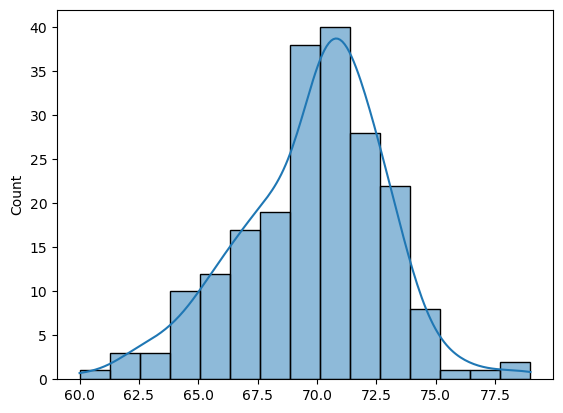

p value:0.0212
Reject null hypothesis >> The data is not normally distributed


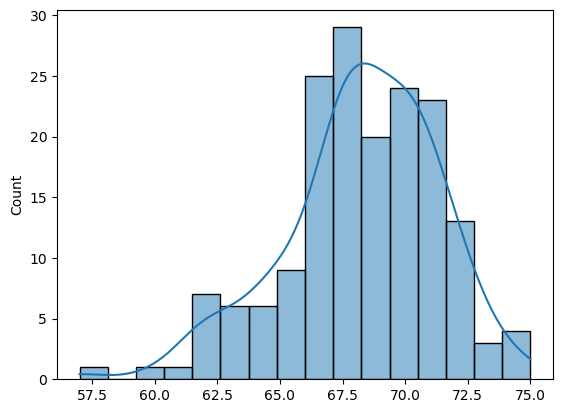

p value:0.1825
Fail to reject null hypothesis >> The data is normally distributed


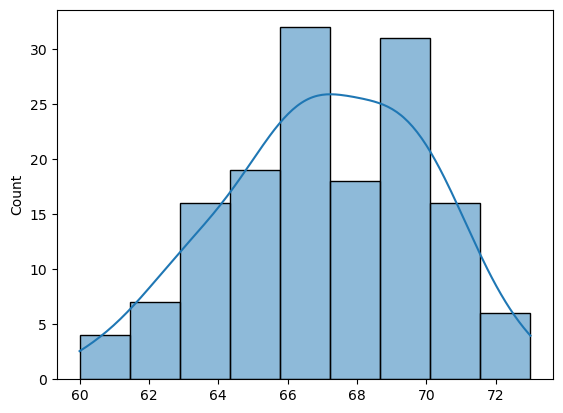

p value:0.0903
Fail to reject null hypothesis >> The data is normally distributed


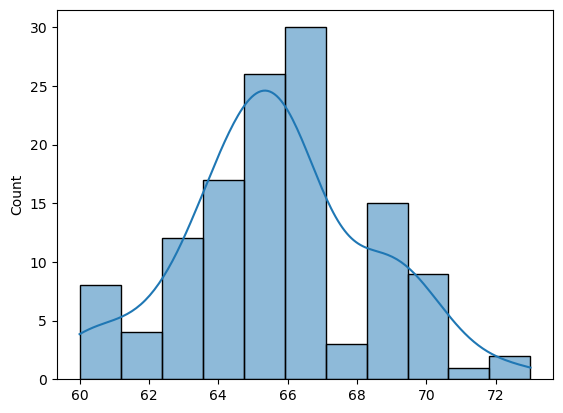

p value:0.5393
Fail to reject null hypothesis >> The data is normally distributed


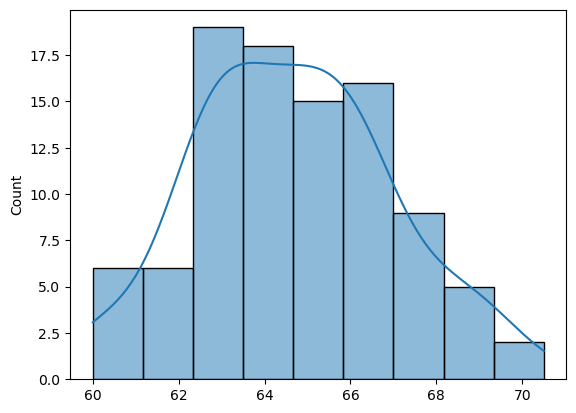

p value:0.3802
Fail to reject null hypothesis >> The data is normally distributed


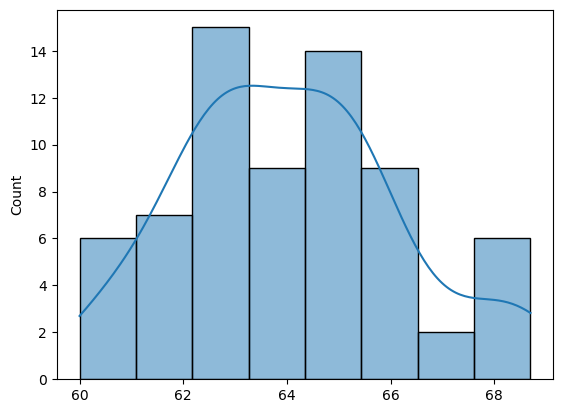

p value:0.9362
Fail to reject null hypothesis >> The data is normally distributed


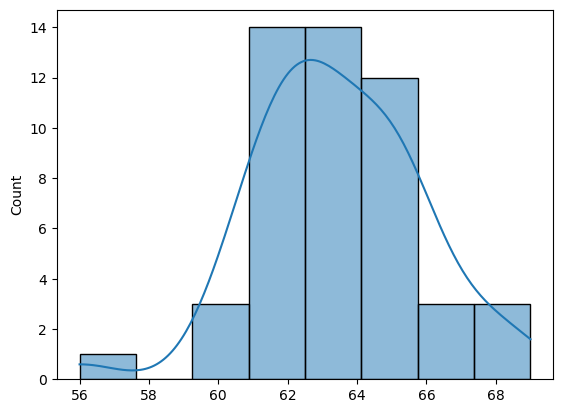

p value:0.4562
Fail to reject null hypothesis >> The data is normally distributed


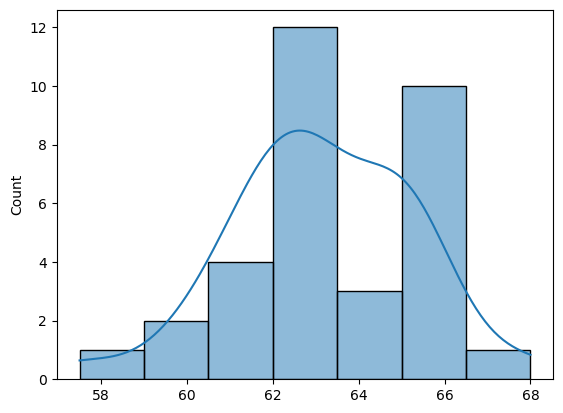

p value:0.3356
Fail to reject null hypothesis >> The data is normally distributed


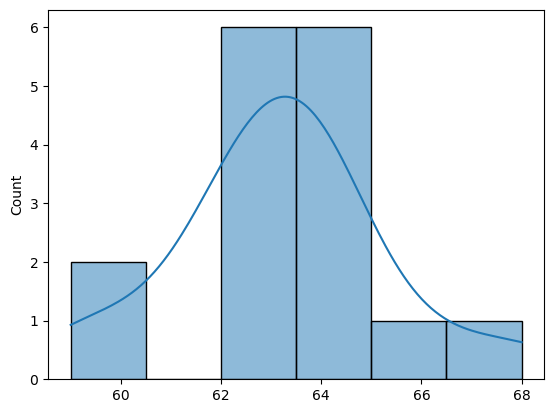

p value:0.5927
Fail to reject null hypothesis >> The data is normally distributed


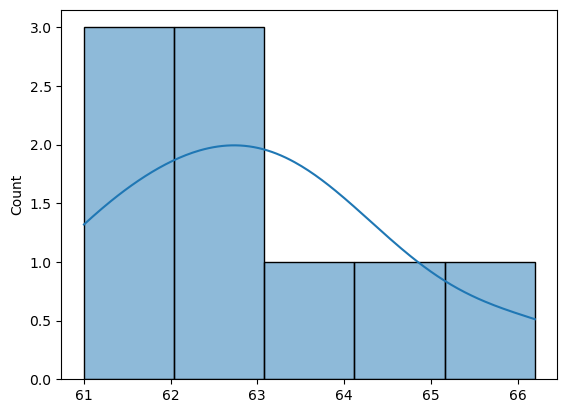

p value:0.3842
Fail to reject null hypothesis >> The data is normally distributed


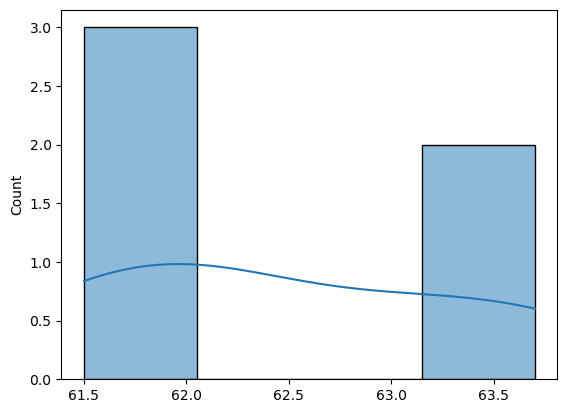

In [43]:
for num in range(11):
    group=groups[num]
    sns.histplot(group,stat = 'count', kde = True)
    check_normality(group)
    plt.show()

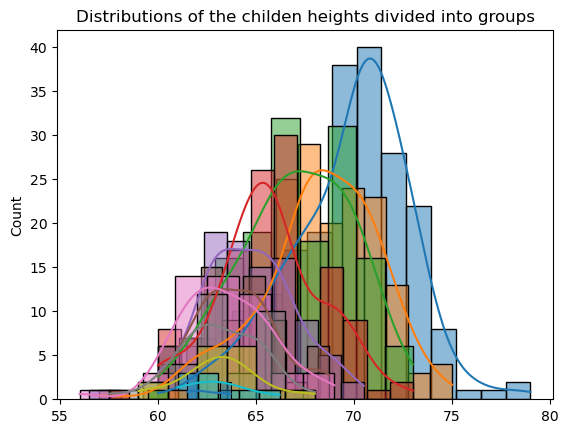

In [44]:
plt.title("Distributions of the childen heights divided into groups")
for group in groups:
    sns.histplot(group,stat = 'count', kde = True)

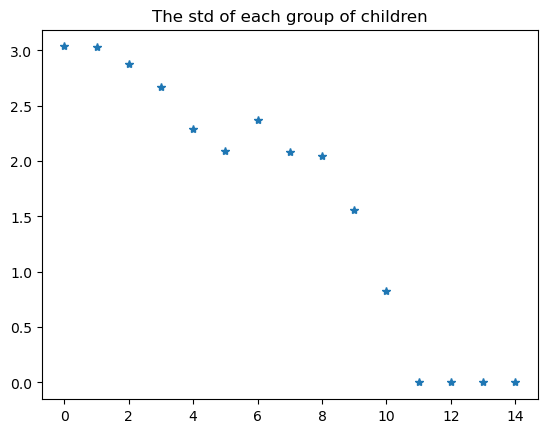

In [45]:
stds=[]
for group in groups:
    stds.append(np.std(group))
    plt.title("The std of each group of children")
plt.plot(stds,"*") 

In [46]:
# Check variance homogeneity using Levene test
stat, pvalue_levene= stats.levene(groups[0],groups[1],groups[2],groups[3],groups[4],groups[5],groups[6],groups[7],groups[8],groups[9],groups[10],
                                  groups[11])

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0028
Reject null hypothesis >> The variances of the samples are different.


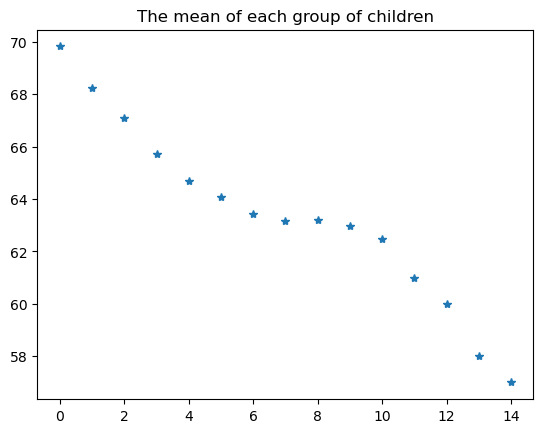

In [47]:
means=[]
for group in groups:
    means.append(np.mean(group))
plt.title("The mean of each group of children")    
plt.plot(means,"*") 

## Correlation matrices

### Pearson correlations matrix for the numerical variables

In [50]:
numerical_df=df[["father","mother","midparentHeight","childHeight"]]

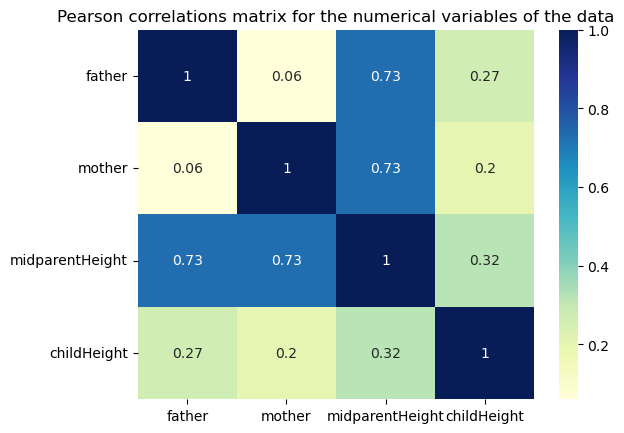

In [249]:
plt.title("Pearson correlations matrix for the numerical variables of the data")
dataplot = sns.heatmap(numerical_df.corr(), cmap="YlGnBu", annot=True) 

In [52]:
# p_values calculation
corr_coefficient, p_value = stats.pearsonr(np.array(numerical_df["childHeight"]),np.array(numerical_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(numerical_df["childHeight"]),np.array(numerical_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(numerical_df["childHeight"]),np.array(numerical_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.26603853892271967 --> with p_value:  1.3498077148869741e-16
child height and mother height correlation:  0.20132194862209996 --> with p_value:  5.362412018228277e-10
child height and midparent height correlation:  0.3209498960639596 --> with p_value:  8.05386499247872e-24


### Spearman correlations matrix for the categorial variables

In [54]:
categorial_df=df[["gender","childHeight"]]

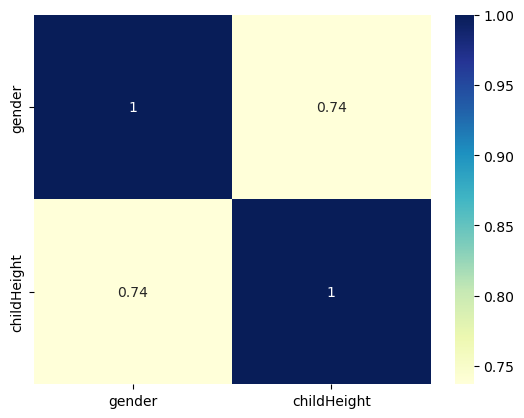

In [55]:
dataplot = sns.heatmap(categorial_df.corr("spearman"), cmap="YlGnBu", annot=True) 

In [56]:
# p_values calculation
corr_coefficient, p_value = stats.spearmanr(np.array(categorial_df["childHeight"]),np.array(categorial_df["gender"] ))
print("child height and gender correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and gender correlation:  0.7370167452367875 --> with p_value:  9.64733265650843e-161


### Pearson matrix for the daughters

In [58]:
girls_df=df[df["gender"]==0]

In [59]:
girls_numerical_df=girls_df[["father","mother","midparentHeight","childHeight"]]

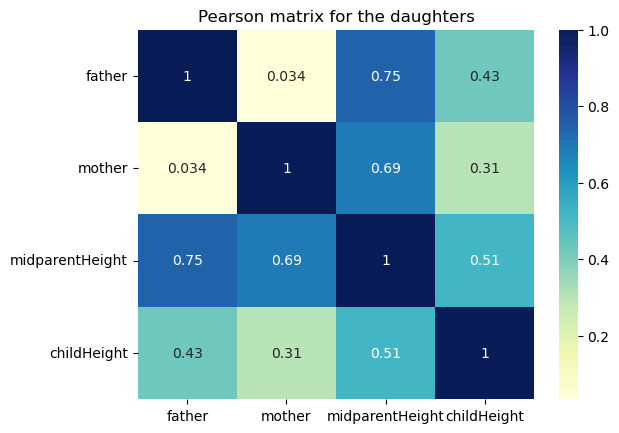

In [60]:
plt.title("Pearson matrix for the daughters")
dataplot = sns.heatmap(girls_numerical_df.corr(), cmap="YlGnBu", annot=True) 

In [61]:
# p_values calculation
corr_coefficient, p_value = stats.pearsonr(np.array(girls_numerical_df["childHeight"]),np.array(girls_numerical_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(girls_numerical_df["childHeight"]),np.array(girls_numerical_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(girls_numerical_df["childHeight"]),np.array(girls_numerical_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.42843297684634896 --> with p_value:  1.1970408643547386e-21
child height and mother height correlation:  0.3051644513268953 --> with p_value:  3.2218315248985794e-11
child height and midparent height correlation:  0.51327251718791 --> with p_value:  8.23952706205857e-32


### Pearson matrix for the sons

In [63]:
boys_df=df[df["gender"]==1]

In [64]:
boys_numerical_df=boys_df[["father","mother","midparentHeight","childHeight"]]

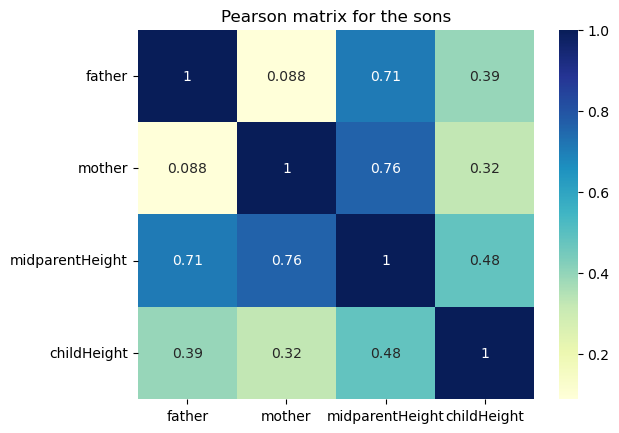

In [65]:
plt.title("Pearson matrix for the sons")
dataplot = sns.heatmap(boys_numerical_df.corr(), cmap="YlGnBu", annot=True) 

In [66]:
# p_values calculation
corr_coefficient, p_value = stats.pearsonr(np.array(boys_numerical_df["childHeight"]),np.array(boys_numerical_df["father"] ))
print("child height and father height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(boys_numerical_df["childHeight"]),np.array(boys_numerical_df["mother"] ))
print("child height and mother height correlation: ", corr_coefficient, "--> with p_value: ", p_value)
corr_coefficient, p_value = stats.pearsonr(np.array(boys_numerical_df["childHeight"]),np.array(boys_numerical_df["midparentHeight"] ))
print("child height and midparent height correlation: ", corr_coefficient, "--> with p_value: ", p_value)

child height and father height correlation:  0.3923834966628357 --> with p_value:  3.737108856194152e-19
child height and mother height correlation:  0.3230049836849058 --> with p_value:  3.837934605721925e-13
child height and midparent height correlation:  0.48275279903014195 --> with p_value:  1.8904769740291211e-29


# Regression models: predict children height

### Classic average height of parents (50-50) as an input, in addition to gender

In [69]:
# relevant data-frame columns
parents_average=(np.array(df["father"])+np.array(df["mother"]))/2
gender=np.array(df["gender"])
childheight=np.array(df["childHeight"])

In [70]:
# Normalize
max_parents_average=max(parents_average)
min_parents_average=min(parents_average)
normalized_parents_average=(parents_average-min_parents_average)/(max_parents_average-min_parents_average)

max_childheight=max(childheight)
min_childheight=min(childheight)
normalized_childheight=(childheight-min_childheight)/(max_childheight-min_childheight)

In [71]:
# Create X, Y arrays
X=np.concatenate((np.reshape(normalized_parents_average,(934,1)),np.reshape(gender,(934,1))),axis=1)
Y=normalized_childheight

In [72]:
# Split to train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [73]:
# train the model
# This callback will stop the training when there is no improvement in loss for 4 consecutive epochs
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=4)

model = tf.keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=10000, validation_data=(X_test,Y_test), verbose=0, callbacks=[callback])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

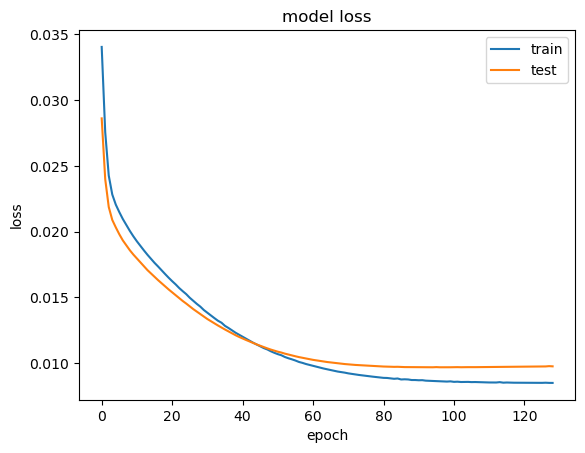

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


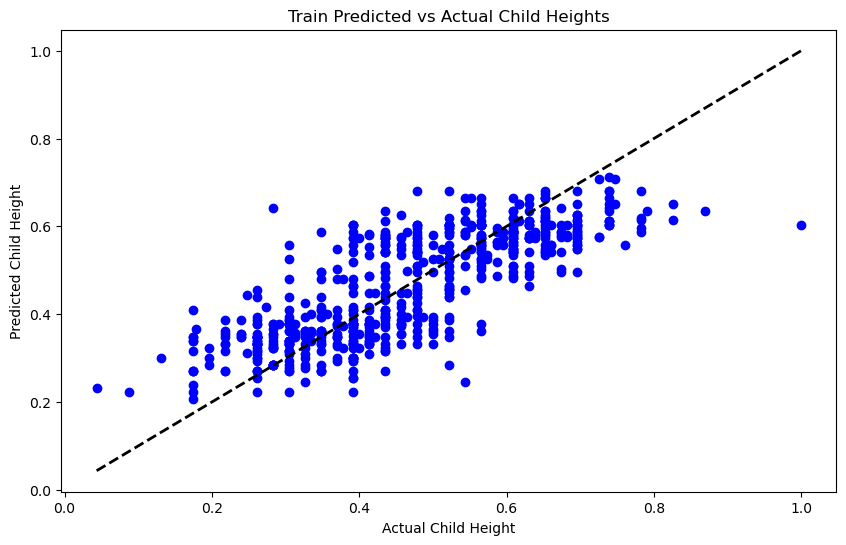

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


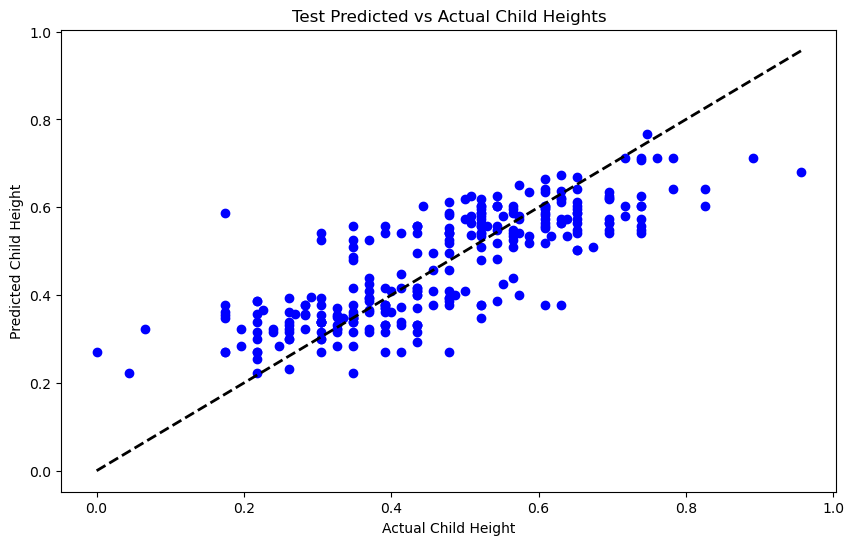

In [75]:
# Plot the predicted vs actual child heights
Y_train_pred=model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_train_pred, color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)
plt.title('Train Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Test Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [76]:
# Calculate MSE
metric = keras.metrics.MeanSquaredError()
metric.update_state(Y_test, model.predict(X_test))
result = metric.result()
result

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<tf.Tensor: shape=(), dtype=float32, numpy=0.009738355>

In [77]:
# Calculate R2
metric = keras.metrics.R2Score()
metric.update_state(Y_test, model.predict(X_test))
result = metric.result()
result

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.6394818>

### Galton midparent height as an input, in addition to gender

In [79]:
# relevant data-frame columns
families=df[["gender","midparentHeight","childHeight"]]

In [80]:
families=np.array(families)

In [81]:
# model input
X=families[:,0:2]
# normalize
x1=X[:,1]
min_x1=min(x1)
max_x1=max(x1)
X[:,1]=(x1-min_x1)/(max_x1-min_x1)
X

array([[1.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 0.2030825 ],
       [1.        , 0.07887579],
       [0.        , 0.07887579]])

In [82]:
# model output
Y=families[:,2]
#normalize
min_y=min(Y)
max_y=max(Y)
Y=(Y-min_y)/(max_y-min_y)

In [83]:
# split to train-test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [84]:
# train the model
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=4)

model = tf.keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=10000, validation_data=(X_test,Y_test), verbose=0,callbacks=[callback])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

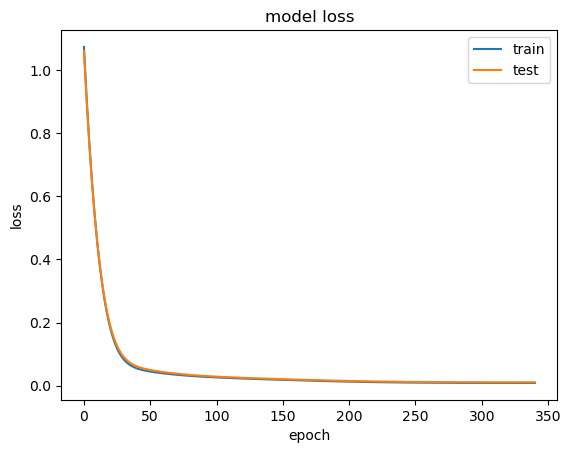

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


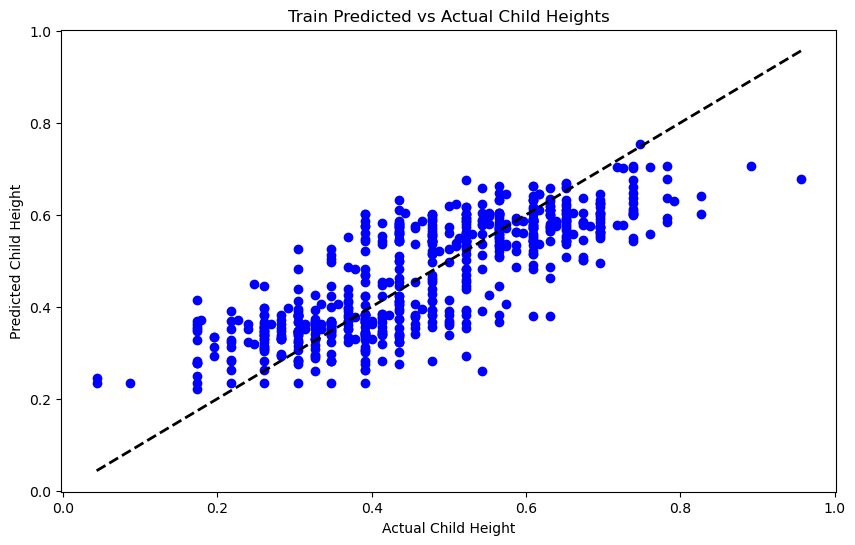

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


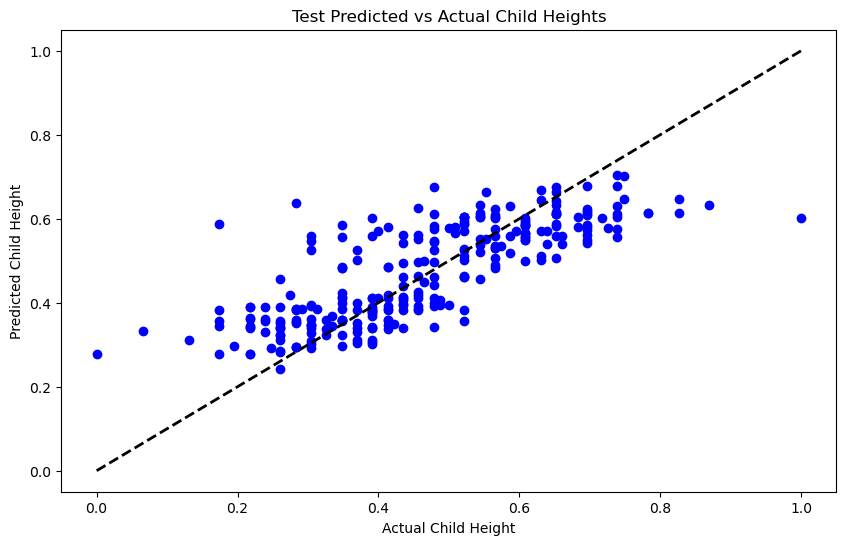

In [86]:
# Plot the predicted vs actual child heights
Y_train_pred=model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_train_pred, color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)
plt.title('Train Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Test Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [87]:
# Calculate MSE
metric = keras.metrics.MeanSquaredError()
metric.update_state(Y_test, model.predict(X_test))
result = metric.result()
result

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.010366365>

In [88]:
# Calculate R2
metric = keras.metrics.R2Score()
metric.update_state(Y_test, Y_test_pred)
result = metric.result()
result

<tf.Tensor: shape=(), dtype=float32, numpy=0.60592526>

### Mom and dad heights as two separate inputs, in addition to gender

In [90]:
families=df[["gender","father","mother","childHeight"]]

In [91]:
families=np.array(families)

In [92]:
X=families[:,0:3]
x1=X[:,1]
# Normalize
min_x1=min(x1)
max_x1=max(x1)
X[:,1]=(x1-min_x1)/(max_x1-min_x1)
x2=X[:,2]
# Normalize
min_x2=min(x2)
max_x2=max(x2)
X[:,2]=(x2-min_x2)/(max_x2-min_x2)

X

array([[1.        , 1.        , 0.72      ],
       [0.        , 1.        , 0.72      ],
       [0.        , 1.        , 0.72      ],
       ...,
       [0.        , 0.        , 0.64      ],
       [1.        , 0.03030303, 0.4       ],
       [0.        , 0.03030303, 0.4       ]])

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [94]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=4)

model = tf.keras.Sequential([
    keras.Input(shape=(3,)),
    layers.Dense(units=1)
])

model.summary()

X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
Y_test = np.asarray(Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(X_train, Y_train, epochs=10000, validation_data=(X_test,Y_test), verbose=0,callbacks=[callback])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

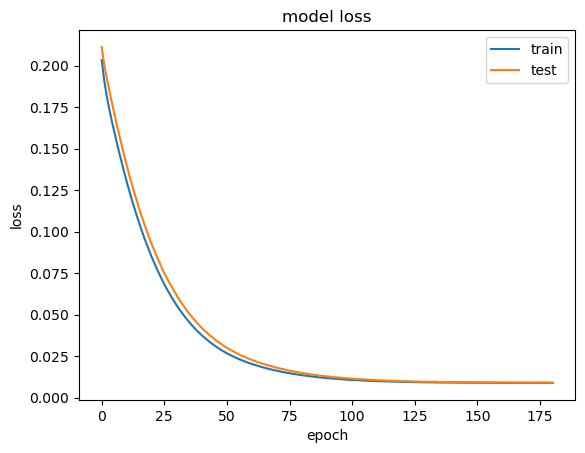

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


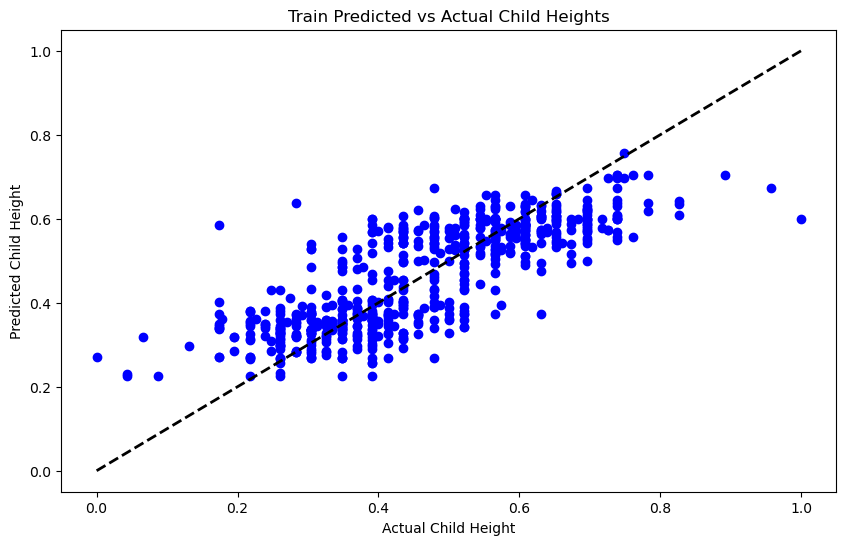

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


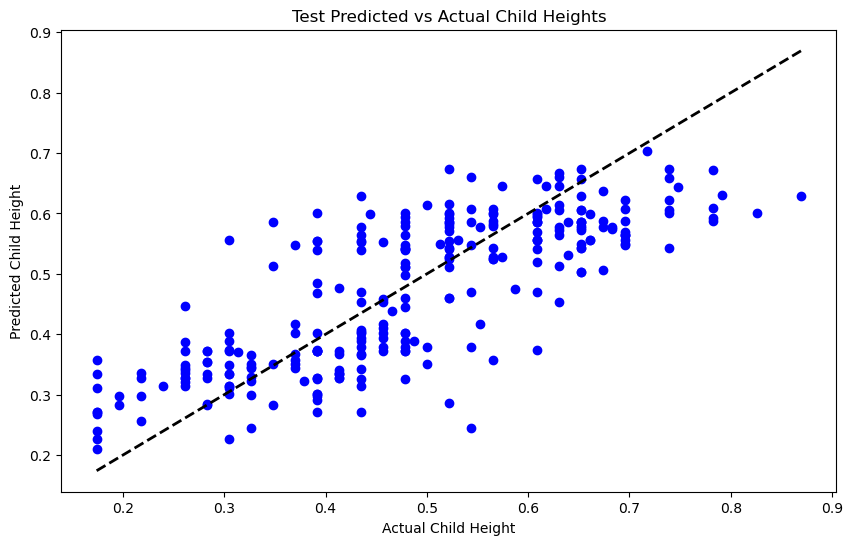

In [96]:
# Plot the predicted vs actual child heights
Y_train_pred=model.predict(X_train)
plt.figure(figsize=(10, 6))
plt.scatter(Y_train, Y_train_pred, color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=2)
plt.title('Train Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()
Y_test_pred=model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_test_pred, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.title('Test Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [97]:
# Calculate MSE
metric = keras.metrics.MeanSquaredError()
metric.update_state(Y_test, model.predict(X_test))
result = metric.result()
result

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.009012112>

In [98]:
# Calculate R2
metric = keras.metrics.R2Score()
metric.update_state(Y_test, Y_test_pred)
result = metric.result()
result

<tf.Tensor: shape=(), dtype=float32, numpy=0.6109506>

### Extracting the optimal weights for the parents' heights in order to predict the child's height: averaging over 100 models

In [258]:
# for-loop to get weights - 100 models 
moms=[]
dads=[]
for i in range(50):
    callback = keras.callbacks.EarlyStopping(monitor='loss', patience=4)
    model = tf.keras.Sequential([
    keras.Input(shape=(3,)),
    layers.Dense(units=1)
    ])

    #model.summary()

    X_train = np.asarray(X_train).astype('float32')
    Y_train = np.asarray(Y_train).astype('float32')
    X_test = np.asarray(X_test).astype('float32')
    Y_test = np.asarray(Y_test).astype('float32')

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        loss='mean_squared_error')
    history = model.fit(X_train, Y_train, epochs=10000, validation_data=(X_test,Y_test), verbose=0, callbacks=[callback])
    weights=model.get_weights()
    dads.append(weights[0][1][0])
    moms.append(weights[0][2][0])

0.2644157


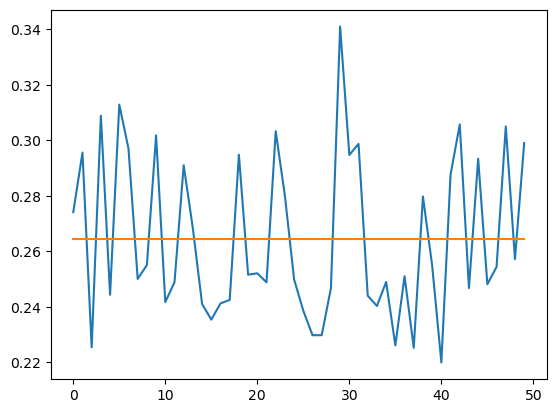

In [259]:
# Fathers
plt.plot(dads)
plt.plot(len(dads)*[np.mean(dads)])
print(np.mean(dads))
plt.show()


0.175399


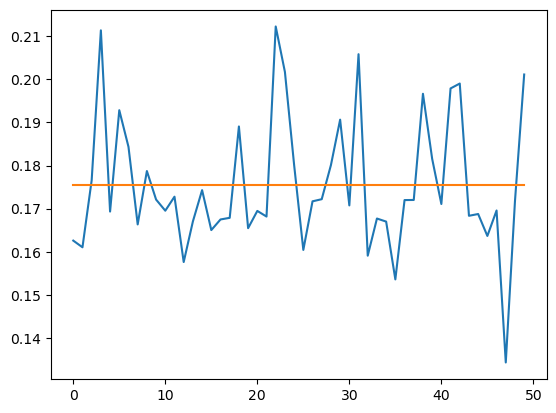

In [260]:
# Mothers
plt.plot(moms)
plt.plot(len(moms)*[np.mean(moms)])
print(np.mean(moms))
plt.show()

#### ---> Thats means: 0.29 * normalazied_fathers + 0.18 * normalazied_mothers

In [104]:
averaged_parents=0.29*X[:,1]+0.18*X[:,2]
# Normalize
max_averaged_parents=max(averaged_parents)
min_averaged_parents=min(averaged_parents)
normalized_averaged_parents=(averaged_parents-min_averaged_parents)/(max_averaged_parents-min_averaged_parents)

In [105]:
new_X=np.concatenate((np.reshape(X[:,0],(934,1)),np.reshape(normalized_averaged_parents,(934,1))),axis=1)
new_X

array([[1.       , 1.       ],
       [0.       , 1.       ],
       [0.       , 1.       ],
       ...,
       [0.       , 0.1440987],
       [1.       , 0.0473399],
       [0.       , 0.0473399]])

In [106]:
avg_X_train, avg_X_test, avg_Y_train, avg_Y_test = train_test_split(new_X, Y, test_size=0.3)

In [107]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=4)

model = tf.keras.Sequential([
    keras.Input(shape=(2,)),
    layers.Dense(units=1)
])

model.summary()

avg_X_train = np.asarray(avg_X_train).astype('float32')
avg_Y_train = np.asarray(avg_Y_train).astype('float32')
avg_X_test = np.asarray(avg_X_test).astype('float32')
avg_Y_test = np.asarray(avg_Y_test).astype('float32')

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error')
history = model.fit(avg_X_train, avg_Y_train, epochs=10000, validation_data=(avg_X_test,avg_Y_test), verbose=0, callbacks=[callback])

Model: "sequential_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)                    │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

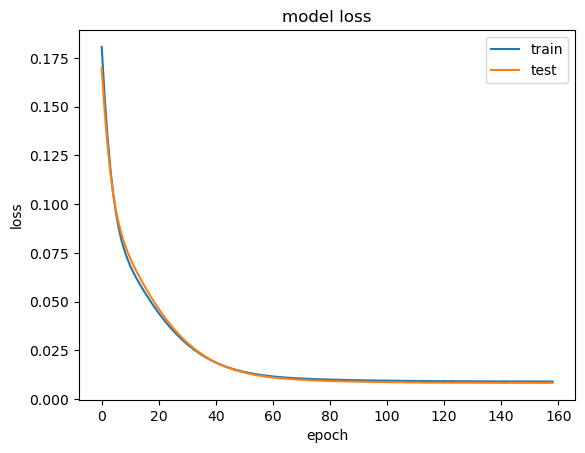

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


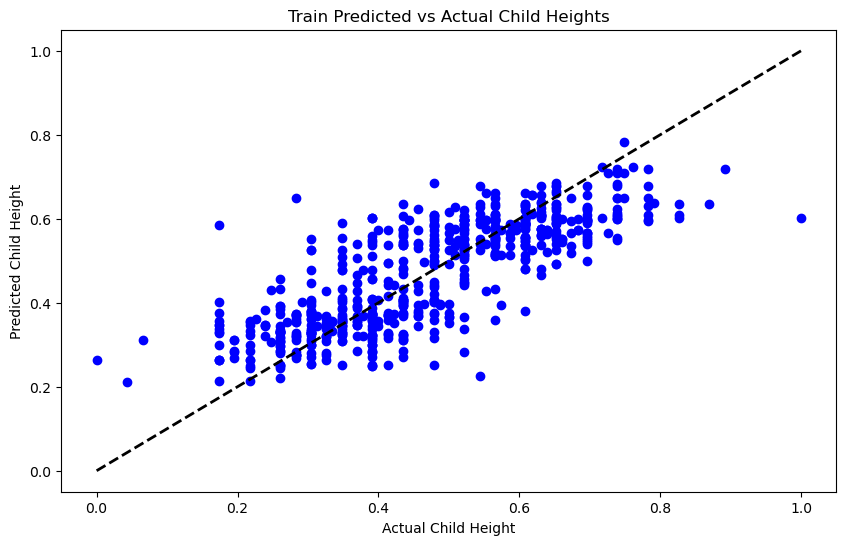

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


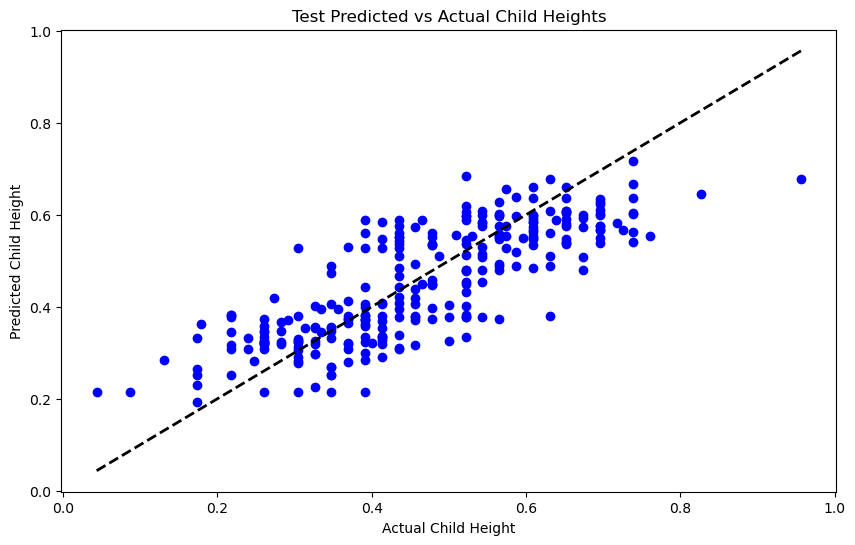

In [109]:
# Plot the predicted vs actual child heights
avg_Y_train_pred=model.predict(avg_X_train)
plt.figure(figsize=(10, 6))
plt.scatter(avg_Y_train, avg_Y_train_pred, color='blue')
plt.plot([avg_Y_train.min(), avg_Y_train.max()], [avg_Y_train.min(), avg_Y_train.max()], 'k--', lw=2)
plt.title('Train Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()
avg_Y_test_pred=model.predict(avg_X_test)
plt.figure(figsize=(10, 6))
plt.scatter(avg_Y_test, avg_Y_test_pred, color='blue')
plt.plot([avg_Y_test.min(), avg_Y_test.max()], [avg_Y_test.min(), avg_Y_test.max()], 'k--', lw=2)
plt.title('Test Predicted vs Actual Child Heights')
plt.xlabel('Actual Child Height')
plt.ylabel('Predicted Child Height')
plt.show()

In [110]:
# Calculate MSE
metric = keras.metrics.MeanSquaredError()
metric.update_state(avg_Y_test, model.predict(avg_X_test))
result = metric.result()
result

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<tf.Tensor: shape=(), dtype=float32, numpy=0.008354356>

In [111]:
# Calculate R2
metric = keras.metrics.R2Score()
metric.update_state(avg_Y_test, model.predict(avg_X_test))
result = metric.result()
result

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.6408984>

# Intra-family tests 

#### Global children height distribution

<Axes: title={'center': 'Children height'}, xlabel='childHeight', ylabel='Count'>

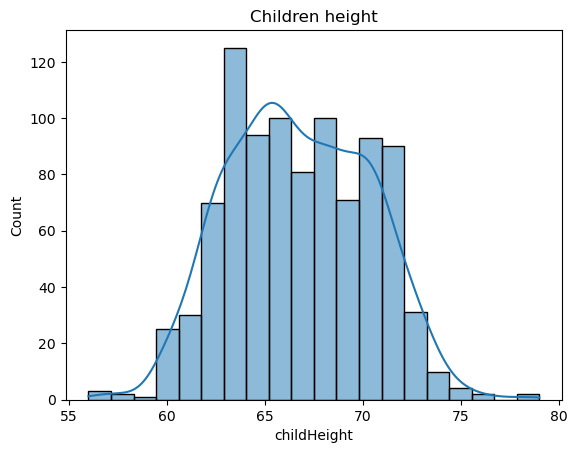

In [114]:
plt.title("Children height")
sns.histplot(df,
               x = "childHeight",
               stat = 'count',
               kde = True)

In [115]:
childHeight=np.array(df["childHeight"])

In [116]:
minH=min(childHeight)
maxH=max(childHeight)
meanH=np.mean(childHeight)
stdH=np.std(childHeight)

In [117]:
print("global minimum is: ",minH)
print("global maximum is: ",maxH)
print("global mean is: ",meanH)
print("global std is: ",stdH)
print("global interval is: ",maxH-minH)

global minimum is:  56.0
global maximum is:  79.0
global mean is:  66.74593147751605
global std is:  3.5773346010057634
global interval is:  23.0


#### In families

In [119]:
# mapping to families
families=[]
current_family=[]
family_num=1
for i in range(correct_df.shape[0]):
    if correct_df["family"].iloc[i] == family_num:
        current_family.append(correct_df["childHeight"].iloc[i])
    else:
        families.append(current_family)
        family_num+=1
        current_family=[]
        current_family.append(correct_df["childHeight"].iloc[i])
families.append(current_family)      

#### Families intervals distribution (calculate: max child minus min child, in each family)

In [121]:
intervals=[]
for family in families:
    if max(family)-min(family)>0:
        intervals.append(max(family)-min(family))

In [122]:
min(intervals)

0.7999999999999972

p value:0.2415
Fail to reject null hypothesis >> The data is normally distributed


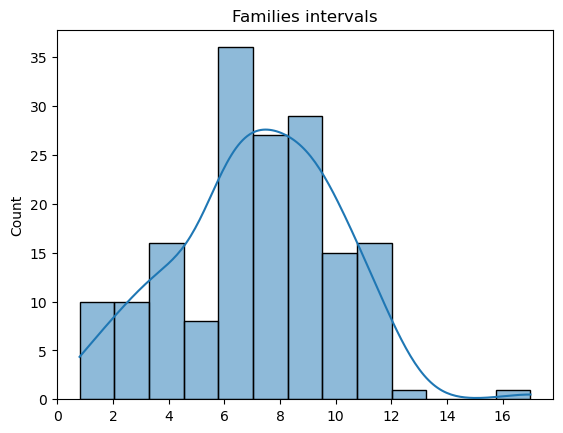

In [123]:
plt.title("Families intervals")
sns.histplot(intervals,stat = 'count', kde = True)
check_normality(intervals)

In [124]:
print("the mean of the families intervals: ", np.mean(intervals))
print("the std of the families intervals: ", np.std(intervals))
print("the max of the families intervals: ", max(intervals))

the mean of the families intervals:  7.1881656804733725
the std of the families intervals:  2.850948488864618
the max of the families intervals:  17.0


#### The std in each family - distriburion through the families

In [126]:
stds=[]
for family in families:
    if len(family)>1:
        stds.append(np.std(family))

p value:0.1565
Fail to reject null hypothesis >> The data is normally distributed


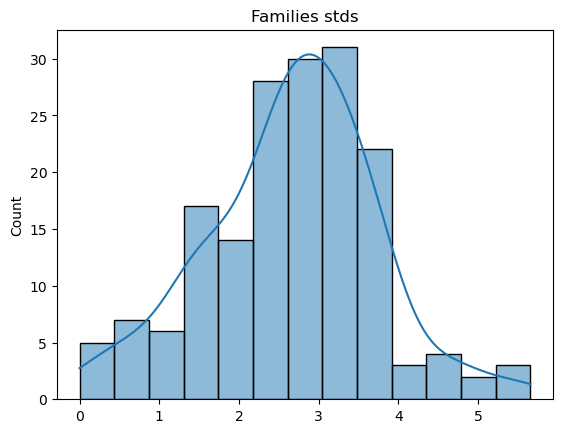

In [127]:
plt.title("Families stds")
sns.histplot(stds,stat = 'count', kde = True)
check_normality(stds)

In [128]:
print("the mean of the families stds: ", np.mean(stds))
print("the std of the families stds: ", np.std(stds))
print("the max of the families stds: ", max(stds))

the mean of the families stds:  2.6613447108158343
the std of the families stds:  1.0636367919824092
the max of the families stds:  5.656854249492381


#### The mean in each family - distriburion through the families


In [130]:
means=[]
for family in families:
    means.append(np.mean(family))

p value:0.8647
Fail to reject null hypothesis >> The data is normally distributed


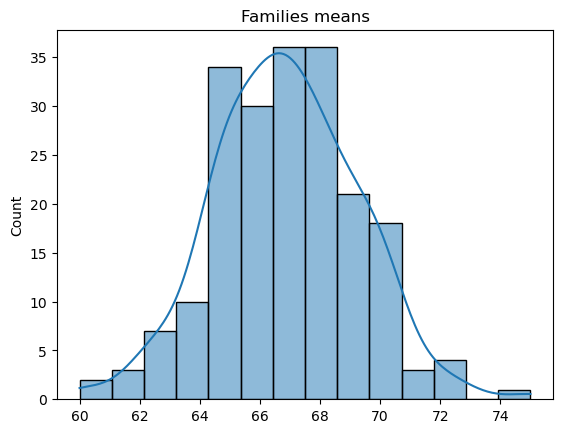

In [131]:
plt.title("Families means")
sns.histplot(means,stat = 'count', kde = True)
check_normality(means)

In [132]:
print("the mean of the families means: ", np.mean(means))
print("the std of the families means: ", np.std(means))
print("the max of the families means: ", max(means))

the mean of the families means:  66.86374193151022
the std of the families means:  2.3677242122190503
the max of the families means:  75.0


### Divide the children according to their number

In [134]:
# Mapping children to groups according to childNum
sorted_df=df.sort_values("childNum")
groups=[]
current_group=[]
child_num=1
for i in range(sorted_df.shape[0]):
    if sorted_df["childNum"].iloc[i] == child_num:
        current_group.append(sorted_df["childHeight"].iloc[i])
    else:
        groups.append(current_group)
        child_num+=1
        current_group=[]
        current_group.append(sorted_df["childHeight"].iloc[i])
groups.append(current_group) 

p value:0.0007
Reject null hypothesis >> The data is not normally distributed


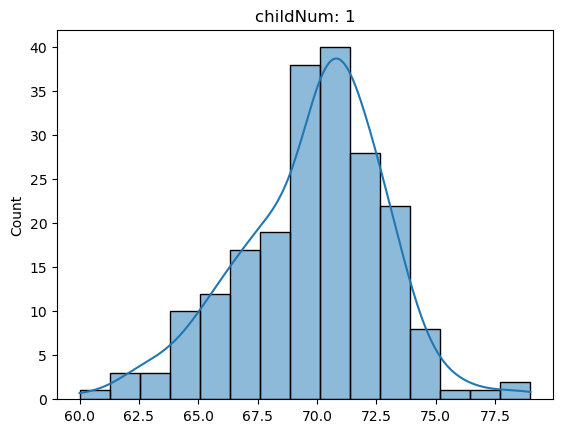

p value:0.0212
Reject null hypothesis >> The data is not normally distributed


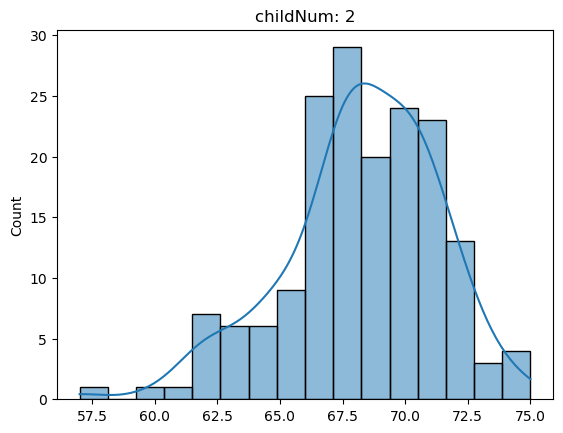

p value:0.1825
Fail to reject null hypothesis >> The data is normally distributed


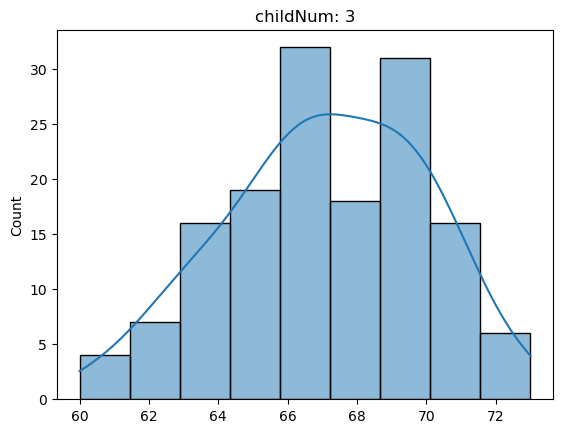

p value:0.0903
Fail to reject null hypothesis >> The data is normally distributed


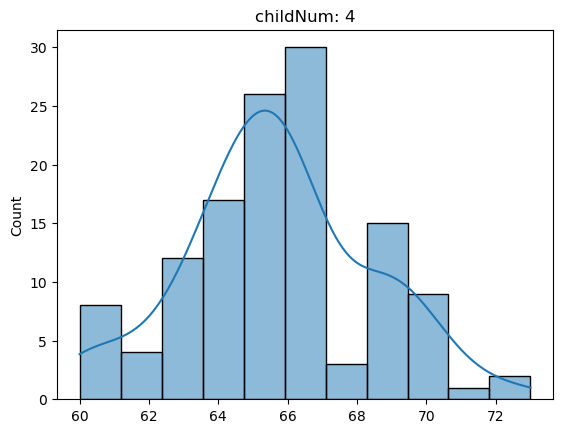

p value:0.5393
Fail to reject null hypothesis >> The data is normally distributed


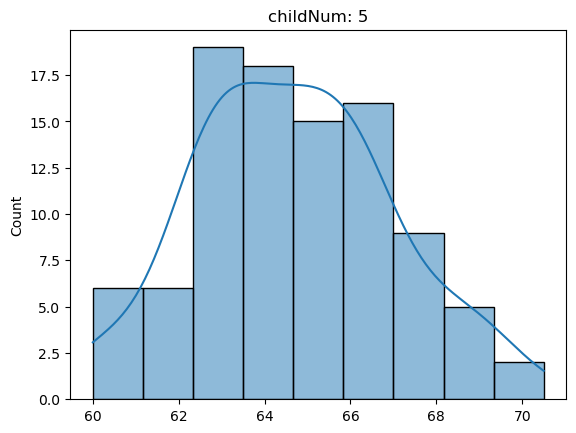

p value:0.3802
Fail to reject null hypothesis >> The data is normally distributed


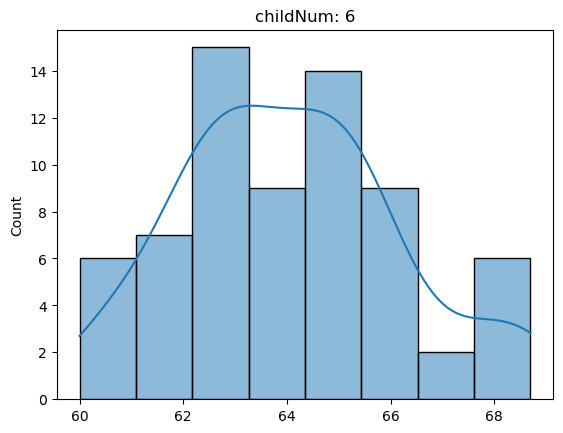

p value:0.9362
Fail to reject null hypothesis >> The data is normally distributed


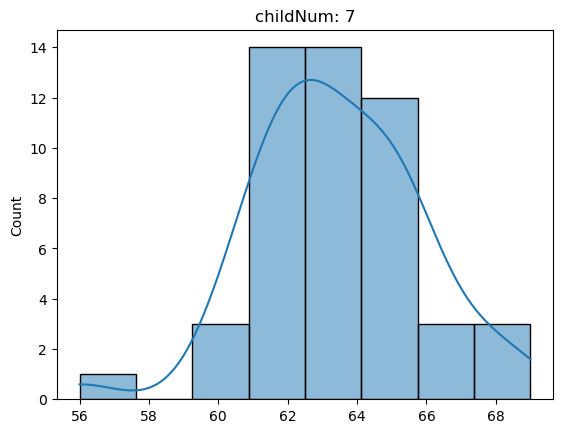

p value:0.4562
Fail to reject null hypothesis >> The data is normally distributed


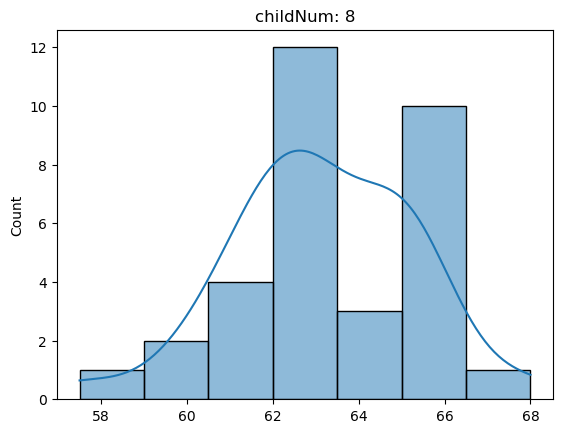

p value:0.3356
Fail to reject null hypothesis >> The data is normally distributed


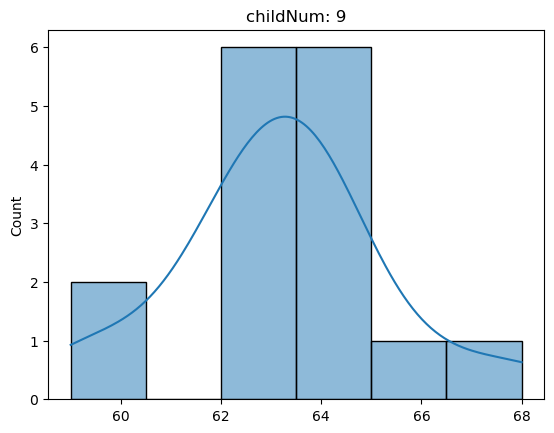

p value:0.5927
Fail to reject null hypothesis >> The data is normally distributed


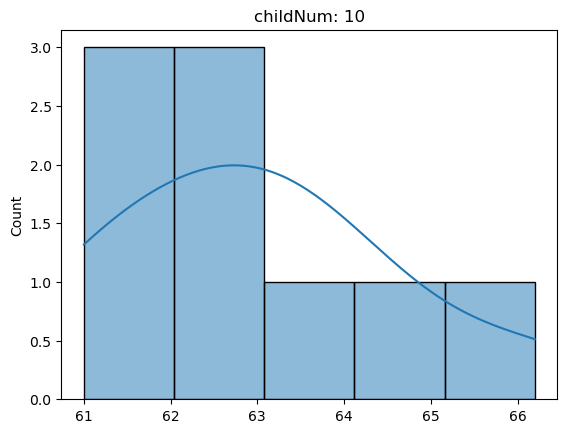

p value:0.3842
Fail to reject null hypothesis >> The data is normally distributed


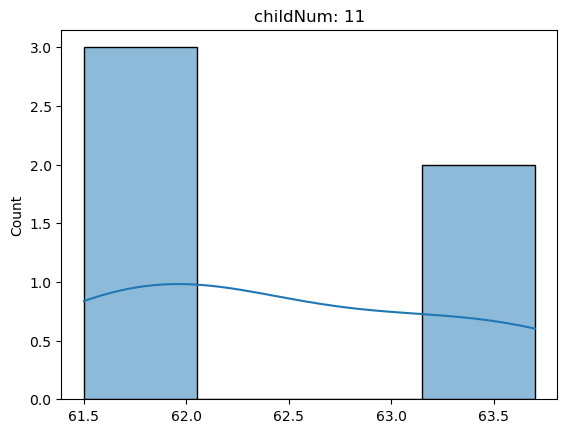

In [135]:
for num in range(11):
    group=groups[num]
    plt.title("childNum: "+ str(num+1))
    sns.histplot(group,stat = 'count', kde = True)
    check_normality(group)
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


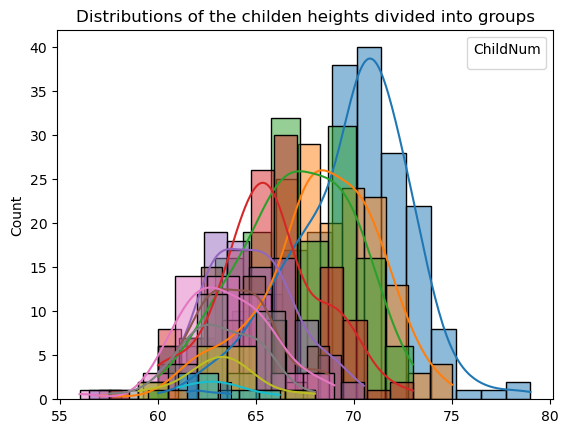

In [296]:
#plt.title("Distributions of the childen heights divided into groups")
fig, ax1 = plt.subplots()
for group in groups:
    sns.histplot(group,stat = 'count', kde = True, ax=ax1)
ax1.set_title("Distributions of the childen heights divided into groups")
legend = ax1.legend(fontsize="small")
legend = ax1.get_legend()
handles = legend.legend_handles
ax1.legend(handles, ['1', '2', '3', '4','5', '6', '7', '8','9', '10', '11', '12','13', '14', '15'], title='ChildNum')    

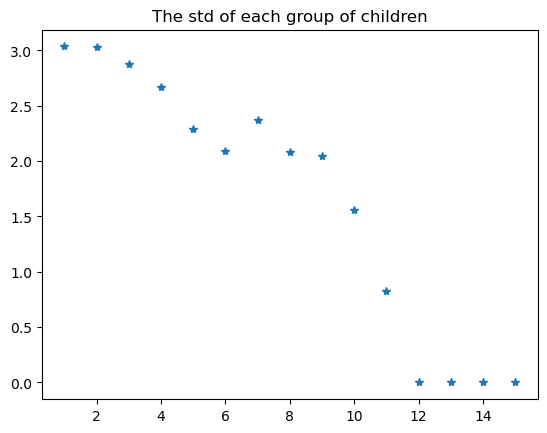

In [266]:
stds=[]
for group in groups:
    stds.append(np.std(group))
    plt.title("The std of each group of children")
plt.plot(np.arange(1,16),stds,"*") 

In [138]:
# Check variance homogeneity using Levene test
stat, pvalue_levene= stats.levene(groups[0],groups[1],groups[2],groups[3],groups[4],groups[5],groups[6],groups[7],groups[8],groups[9],groups[10],
                                  groups[11])

print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")

p value:0.0028
Reject null hypothesis >> The variances of the samples are different.


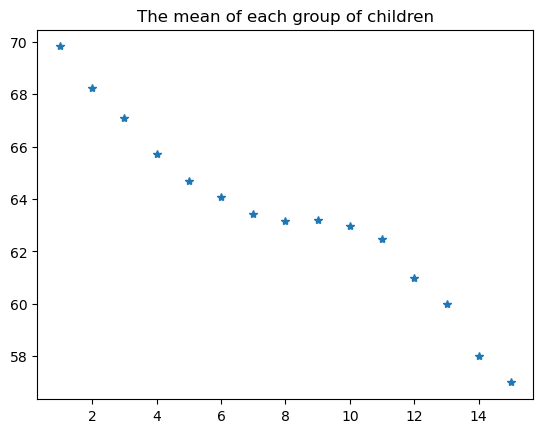

In [268]:
means=[]
for group in groups:
    means.append(np.mean(group))
plt.title("The mean of each group of children")    
plt.plot(np.arange(1,16),means,"*") 